In [1]:
import os
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import exp_params
from estimation import *

USING Q-FUNCTION POINTS


In [2]:
cm = 1 / 2.54
color_Q = "#882255"
color_W_corr = "#EF7929"
color_W_norm = "blue"

W_exp_directory = r"results_dimensions\exp\W"
W_exp_T2_directory = r"results_t2\exp\W"

Q_exp_directory = r"results_dimensions\exp\Q\minimal"
Q_exp_T2_directory = r"results_t2\exp\Q"

# Fidelity v T2 processing

In [9]:
def extract_W_T2_fidelities(directory):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    results_corr = np.zeros((5, 2))
    results_norm = np.zeros((5, 2))
    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        fidelity_corr = data["F_Bayes_BME_corr"].squeeze().astype(float)
        fidelity_norm = data["F_Bayes_BME_norm"].squeeze().astype(float)
        # final_rho_BME_corr = data["final_rho_BME_corr"].squeeze()
        # final_rho_BME_norm = data["final_rho_BME_norm"].squeeze()
        # print(sim_fidelity)
        results_corr[int(file_name[13]), :] = np.array(
            [np.average(fidelity_corr), np.std(fidelity_corr)]
        )
        results_norm[int(file_name[13]), :] = np.array(
            [np.average(fidelity_norm), np.std(fidelity_norm)]
        )

    return results_corr, results_norm  # , final_rho_BME_corr, final_rho_BME_norm


def extract_Q_T2_fidelities(directory):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    results = np.zeros((5, 2))

    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        fidelity = data["F_Bayes_BME"].squeeze()
        # final_rho_BME = data["final_rho_BME"].squeeze()
        # print(sim_fidelity)
        results[int(file_name[13]), :] = np.array(
            [np.average(fidelity), np.std(fidelity)]
        )

    return results  # , final_rho_BME



In [10]:

Q_exp_T2_fidelities = extract_Q_T2_fidelities(Q_exp_T2_directory)


W_corr_exp_T2_fidelities, W_norm_exp_T2_fidelities = extract_W_T2_fidelities(W_exp_T2_directory)

In [11]:
Q_sim_T2_grape_directory = r"results_t2\sim\Q\grape_target_states"
Q_sim_T2_grape_results = extract_Q_T2_fidelities(Q_sim_T2_grape_directory)

# Q_sim_T2_ideal_directory = r"results_t2\sim\Q\ideal_target_states"
# Q_sim_T2_ideal_results = extract_Q_T2_data(Q_sim_T2_ideal_directory)

W_sim_T2_grape_directory = r"results_t2\sim\W\grape_target_states"
W_corr_sim_T2_grape_results, W_norm_sim_T2_grape_results = extract_W_T2_fidelities(
    W_sim_T2_grape_directory
)

# W_sim_T2_ideal_directory = r"results_t2\sim\W\ideal_target_states"
# W_corr_sim_T2_ideal_results, W_norm_sim_T2_ideal_results = extract_W_T2_data(
#     W_sim_T2_ideal_directory
# )

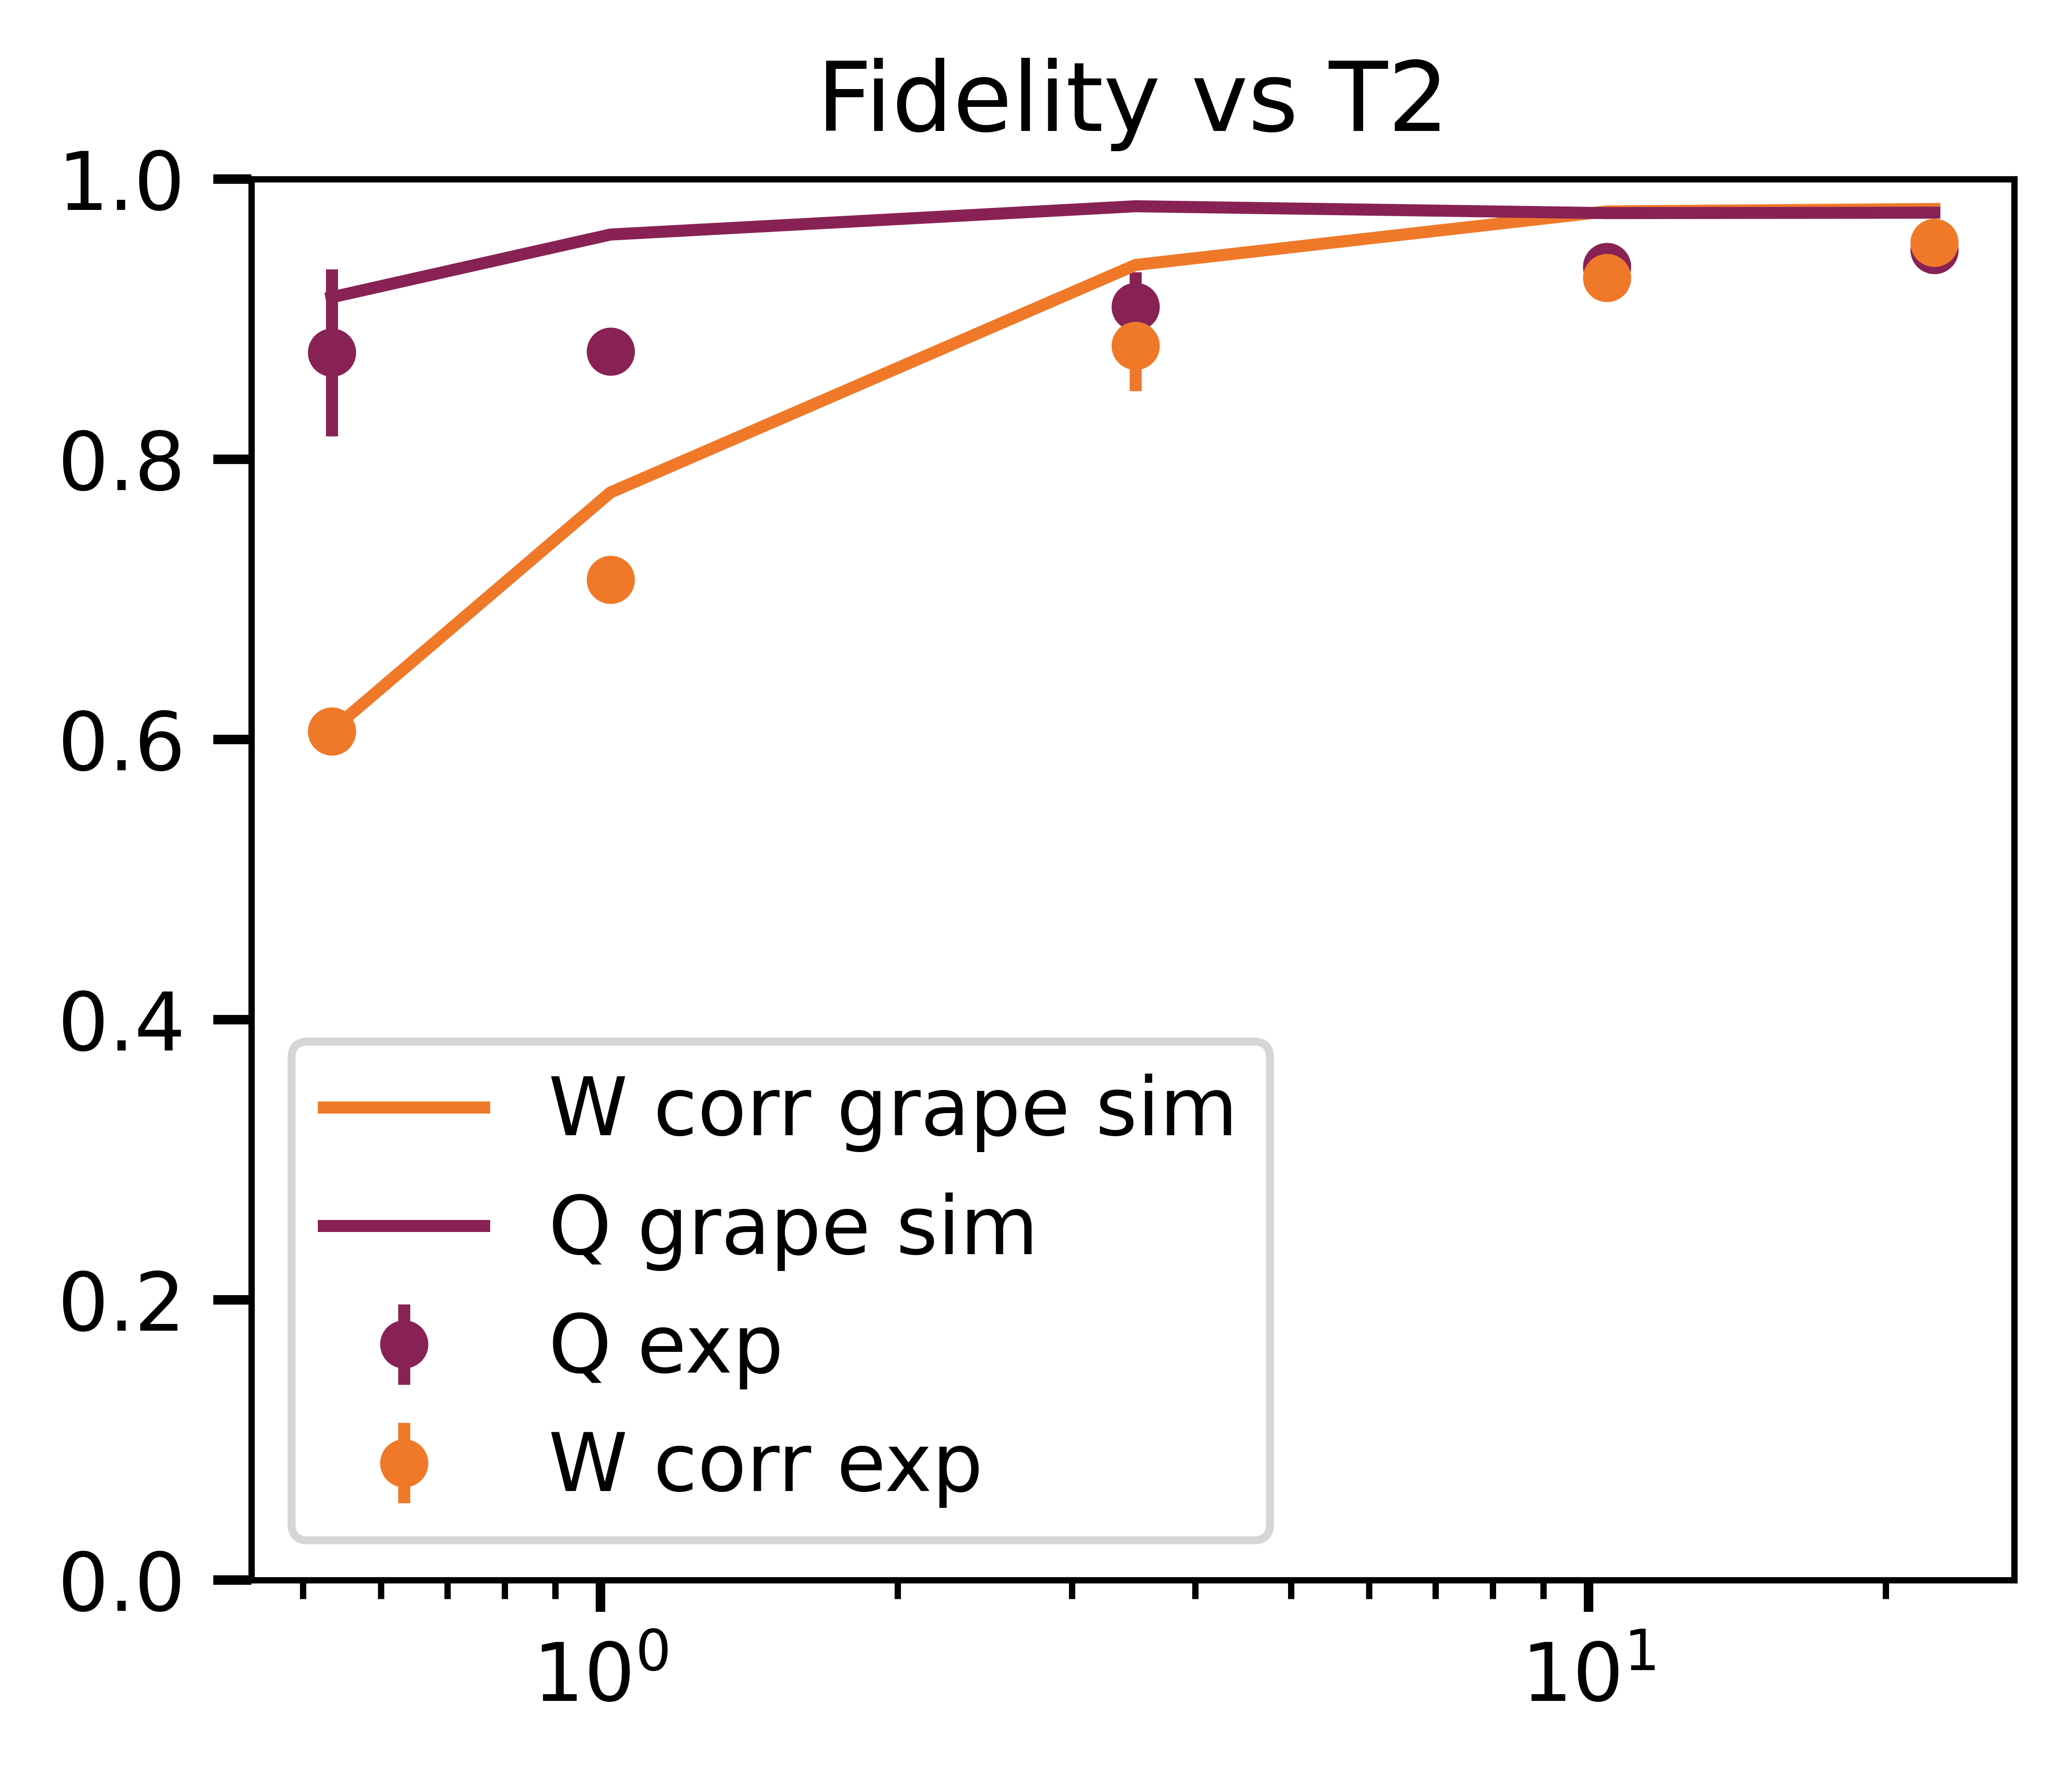

In [12]:
fig = plt.figure(figsize=(10 * cm, 8 * cm), dpi=1200)
ax = fig.add_subplot(111)
plt.setp(ax.spines.values(), linewidth=2 * cm)

hfont = {"fontname": "Corbel"}
ax.tick_params(axis="x", which="major", length=10 * cm, width=3 * cm)
ax.tick_params(axis="y", which="major", length=12 * cm, width=3 * cm)
ax.tick_params(axis="both", which="minor", length=6 * cm, width=2 * cm)

ax.set_ylim([0, 1])
T2s = exp_params.badt2_list / 1e3
s = 5

my_labels = {"Q exp": "Q exp", "W corr exp": "W corr exp", "W norm exp": "W norm exp"}

for i in range(len(T2s)):
    ax.errorbar(
        x=T2s[i],
        y=Q_exp_T2_fidelities[i, 0],
        yerr=Q_exp_T2_fidelities[i, 1],
        c=color_Q,
        fmt="o",
        label=my_labels["Q exp"],
        #     marker=marker_shape[i],
        markersize=s,
        #     edgecolor=edge_color[i],
        #     linewidth=lw,
    )
    my_labels["Q exp"] = "_nolegend_"
    ax.errorbar(
        x=T2s[i],
        y=W_corr_exp_T2_fidelities[i, 0],
        yerr=W_corr_exp_T2_fidelities[i, 1],
        c=color_W_corr,
        fmt="o",
        label=my_labels["W corr exp"],
        #     marker=marker_shape[i],
        markersize=s,
        #     edgecolor=edge_color[i],
        #     linewidth=lw,
    )
    my_labels["W corr exp"] = "_nolegend_"
    # ax.errorbar(
    #     x=T2s[i],
    #     y=W_norm_exp_T2_results[i, 0],
    #     yerr=W_norm_exp_T2_results[i, 1],
    #     c=color_W_norm,
    #     fmt="o",
    #     label=my_labels["W norm exp"],
    #     #     marker=marker_shape[i],
    #     markersize=s
    #     #     edgecolor=edge_color[i],
    #     #     linewidth=lw,
    # )
    # my_labels["W norm exp"] = "_nolegend_"


# plt.plot(
#     T2s,
#     W_corr_sim_T2_ideal_results[:, 0],
#     ":",
#     color=color_W_corr,
#     label="W corr ideal sim",
# )

plt.plot(
    T2s,
    W_corr_sim_T2_grape_results[:, 0],
    "-",
    color=color_W_corr,
    label="W corr grape sim",
)

# plt.plot(
#     T2s,
#     W_norm_sim_T2_ideal_results[:, 0],
#     ":",
#     color=color_W_norm,
#     label="W norm ideal sim",
# )
# plt.plot(
#     T2s,
#     W_norm_sim_T2_grape_results[:, 0],
#     "-",
#     color=color_W_norm,
#     label="W norm grape sim",
# )

# plt.plot(
#     T2s,
#     Q_sim_T2_ideal_results[:, 0],
#     ":",
#     color=color_Q,
#     label="Q ideal sim",
# )
plt.plot(
    T2s,
    Q_sim_T2_grape_results[:, 0],
    "-",
    color=color_Q,
    label="Q grape sim",
)

ax.set_xscale("log")
ax.legend()
ax.set_title("Fidelity vs T2")
plt.show()

# Get Wigners for T2

In [33]:
def extract_W_T2_rhos(directory):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    # results_corr = np.zeros((5, 2))
    # results_norm = np.zeros((5, 2))
    final_rho_BME_corr = np.empty((5, 4, 6, 6), dtype=np.complex_)
    final_rho_BME_norm = np.empty((5, 4, 6, 6), dtype=np.complex_)
    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        # fidelity_corr = data["F_Bayes_BME_corr"].squeeze().astype(float)
        # fidelity_norm = data["F_Bayes_BME_norm"].squeeze().astype(float)
        final_rho_BME_corr[int(file_name[13]), :] = data["final_rho_BME_corr"].squeeze()
        final_rho_BME_norm[int(file_name[13]), :] = data["final_rho_BME_norm"].squeeze()
        # print(sim_fidelity)
        # results_corr[int(file_name[13]), :] = np.array(
        #     [np.average(fidelity_corr), np.std(fidelity_corr)]
        # )
        # results_norm[int(file_name[13]), :] = np.array(
        #     [np.average(fidelity_norm), np.std(fidelity_norm)]
        # )

    return final_rho_BME_corr, final_rho_BME_norm


def extract_Q_T2_rhos(directory):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    results = np.zeros((5, 2))
    final_rho_BME = np.empty((5, 4, 6, 6), dtype=np.complex_)
    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        # fidelity = data["F_Bayes_BME"].squeeze()
        final_rho_BME[int(file_name[13]), :] = data["final_rho_BME"].squeeze()
        # print(sim_fidelity)
        # results[int(file_name[13]), :] = np.array(
        #     [np.average(fidelity), np.std(fidelity)]
        # )

    return final_rho_BME

In [34]:
Q_exp_T2_rhos = extract_Q_T2_rhos(Q_exp_T2_directory)

W_corr_exp_T2_rhos, W_norm_exp_T2_rhos = extract_W_T2_rhos(
    W_exp_T2_directory
)


In [35]:
which_t2_to_plot = 4 # from 0 to 4, from highest to lowest T2
which_cat_to_plot = 3 # from 0 to 3



(<Figure size 800x800 with 1 Axes>, <Axes: >)

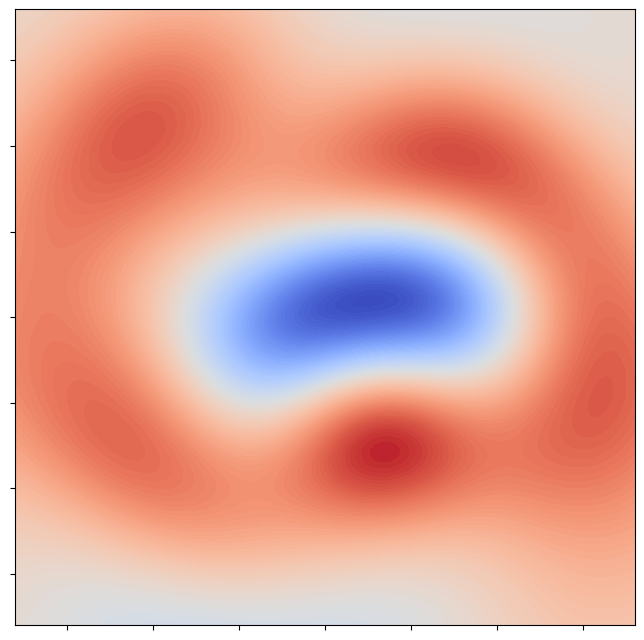

In [36]:
plot_wigner(Qobj(Q_exp_T2_rhos[which_t2_to_plot, which_cat_to_plot, :, :]))

(<Figure size 800x800 with 1 Axes>, <Axes: >)

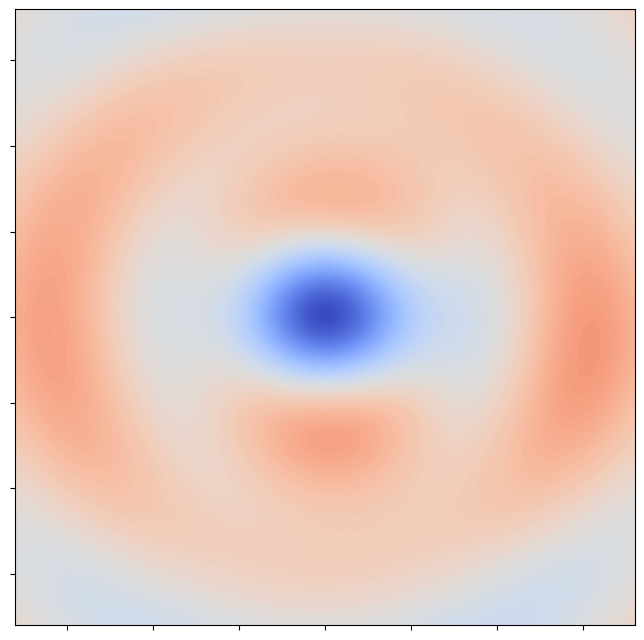

In [37]:
plot_wigner(Qobj(W_corr_exp_T2_rhos[which_t2_to_plot, which_cat_to_plot, :, :]))

(<Figure size 800x800 with 1 Axes>, <Axes: >)

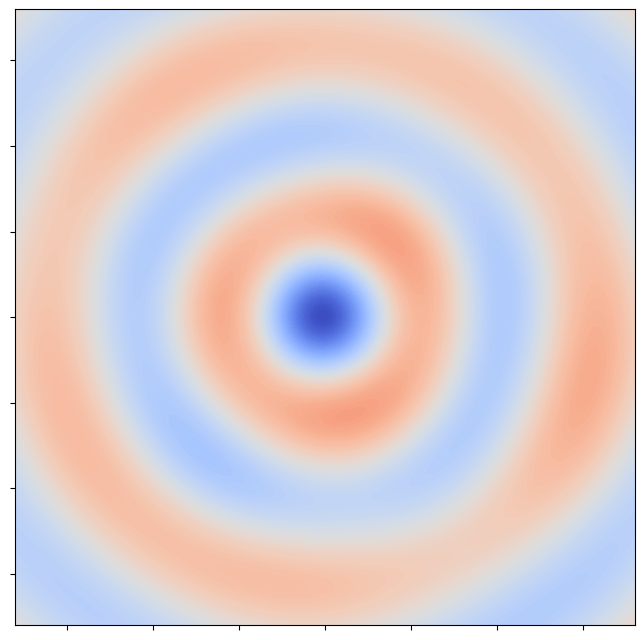

In [38]:
plot_wigner(Qobj(W_norm_exp_T2_rhos[which_t2_to_plot, which_cat_to_plot, :, :]))

# Fidelity v dimension processing

In [16]:
def extract_W_data(directory, numDims):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays

    
    results_corr = np.zeros((numDims, 2))
    results_norm = np.zeros((numDims, 2))
    
    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        fidelity_corr = data["F_Bayes_BME_corr"].squeeze().astype(float)
        fidelity_norm = data["F_Bayes_BME_norm"].squeeze().astype(float)
        # print(sim_fidelity)
        results_corr[int(file_name[10]) - 2, :] = np.array(
            [np.average(fidelity_corr), np.std(fidelity_corr)]
        )
        results_norm[int(file_name[10]) - 2, :] = np.array(
            [np.average(fidelity_norm), np.std(fidelity_norm)]
        )

    return results_corr, results_norm


def extract_Q_data(directory, numDims):
    # Get a list of all .npz files in the directory
    npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]
    # Initialize an empty list to store arrays
    results = np.zeros((numDims, 2))
    

    # Iterate through each .npz file
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        file_name = os.path.basename(file_path)

        # Load the .npz file using numpy.load
        data = np.load(file_path)
        fidelity = data["F_Bayes_BME"].squeeze().astype(float)
        # print(sim_fidelity)
        results[int(file_name[10]) - 2, :] = np.array(
            [np.average(fidelity), np.std(fidelity)]
        )

    return results

In [17]:

W_corr_exp_results, W_norm_exp_results = extract_W_data(W_exp_directory, numDims=5)

Q_exp_results = extract_Q_data(Q_exp_directory, numDims=5)

In [18]:
W_sim_grape_directory = r"results_dimensions\sim\W\grape_target_states"
W_corr_sim_grape_results, W_norm_sim_grape_results = extract_W_data(
    W_sim_grape_directory, numDims=5
)

W_sim_ideal_directory = r"results_dimensions\sim\W\ideal_target_states"
W_corr_sim_ideal_results, W_norm_sim_ideal_results = extract_W_data(
    W_sim_ideal_directory, numDims=7
)


Q_sim_grape_directory = r"results_dimensions\sim\Q\grape_target_states"
Q_sim_grape_results = extract_Q_data(Q_sim_grape_directory, numDims=5)

Q_sim_ideal_directory = r"results_dimensions\sim\Q\ideal_target_states"
Q_sim_ideal_results = extract_Q_data(Q_sim_ideal_directory, numDims=7)

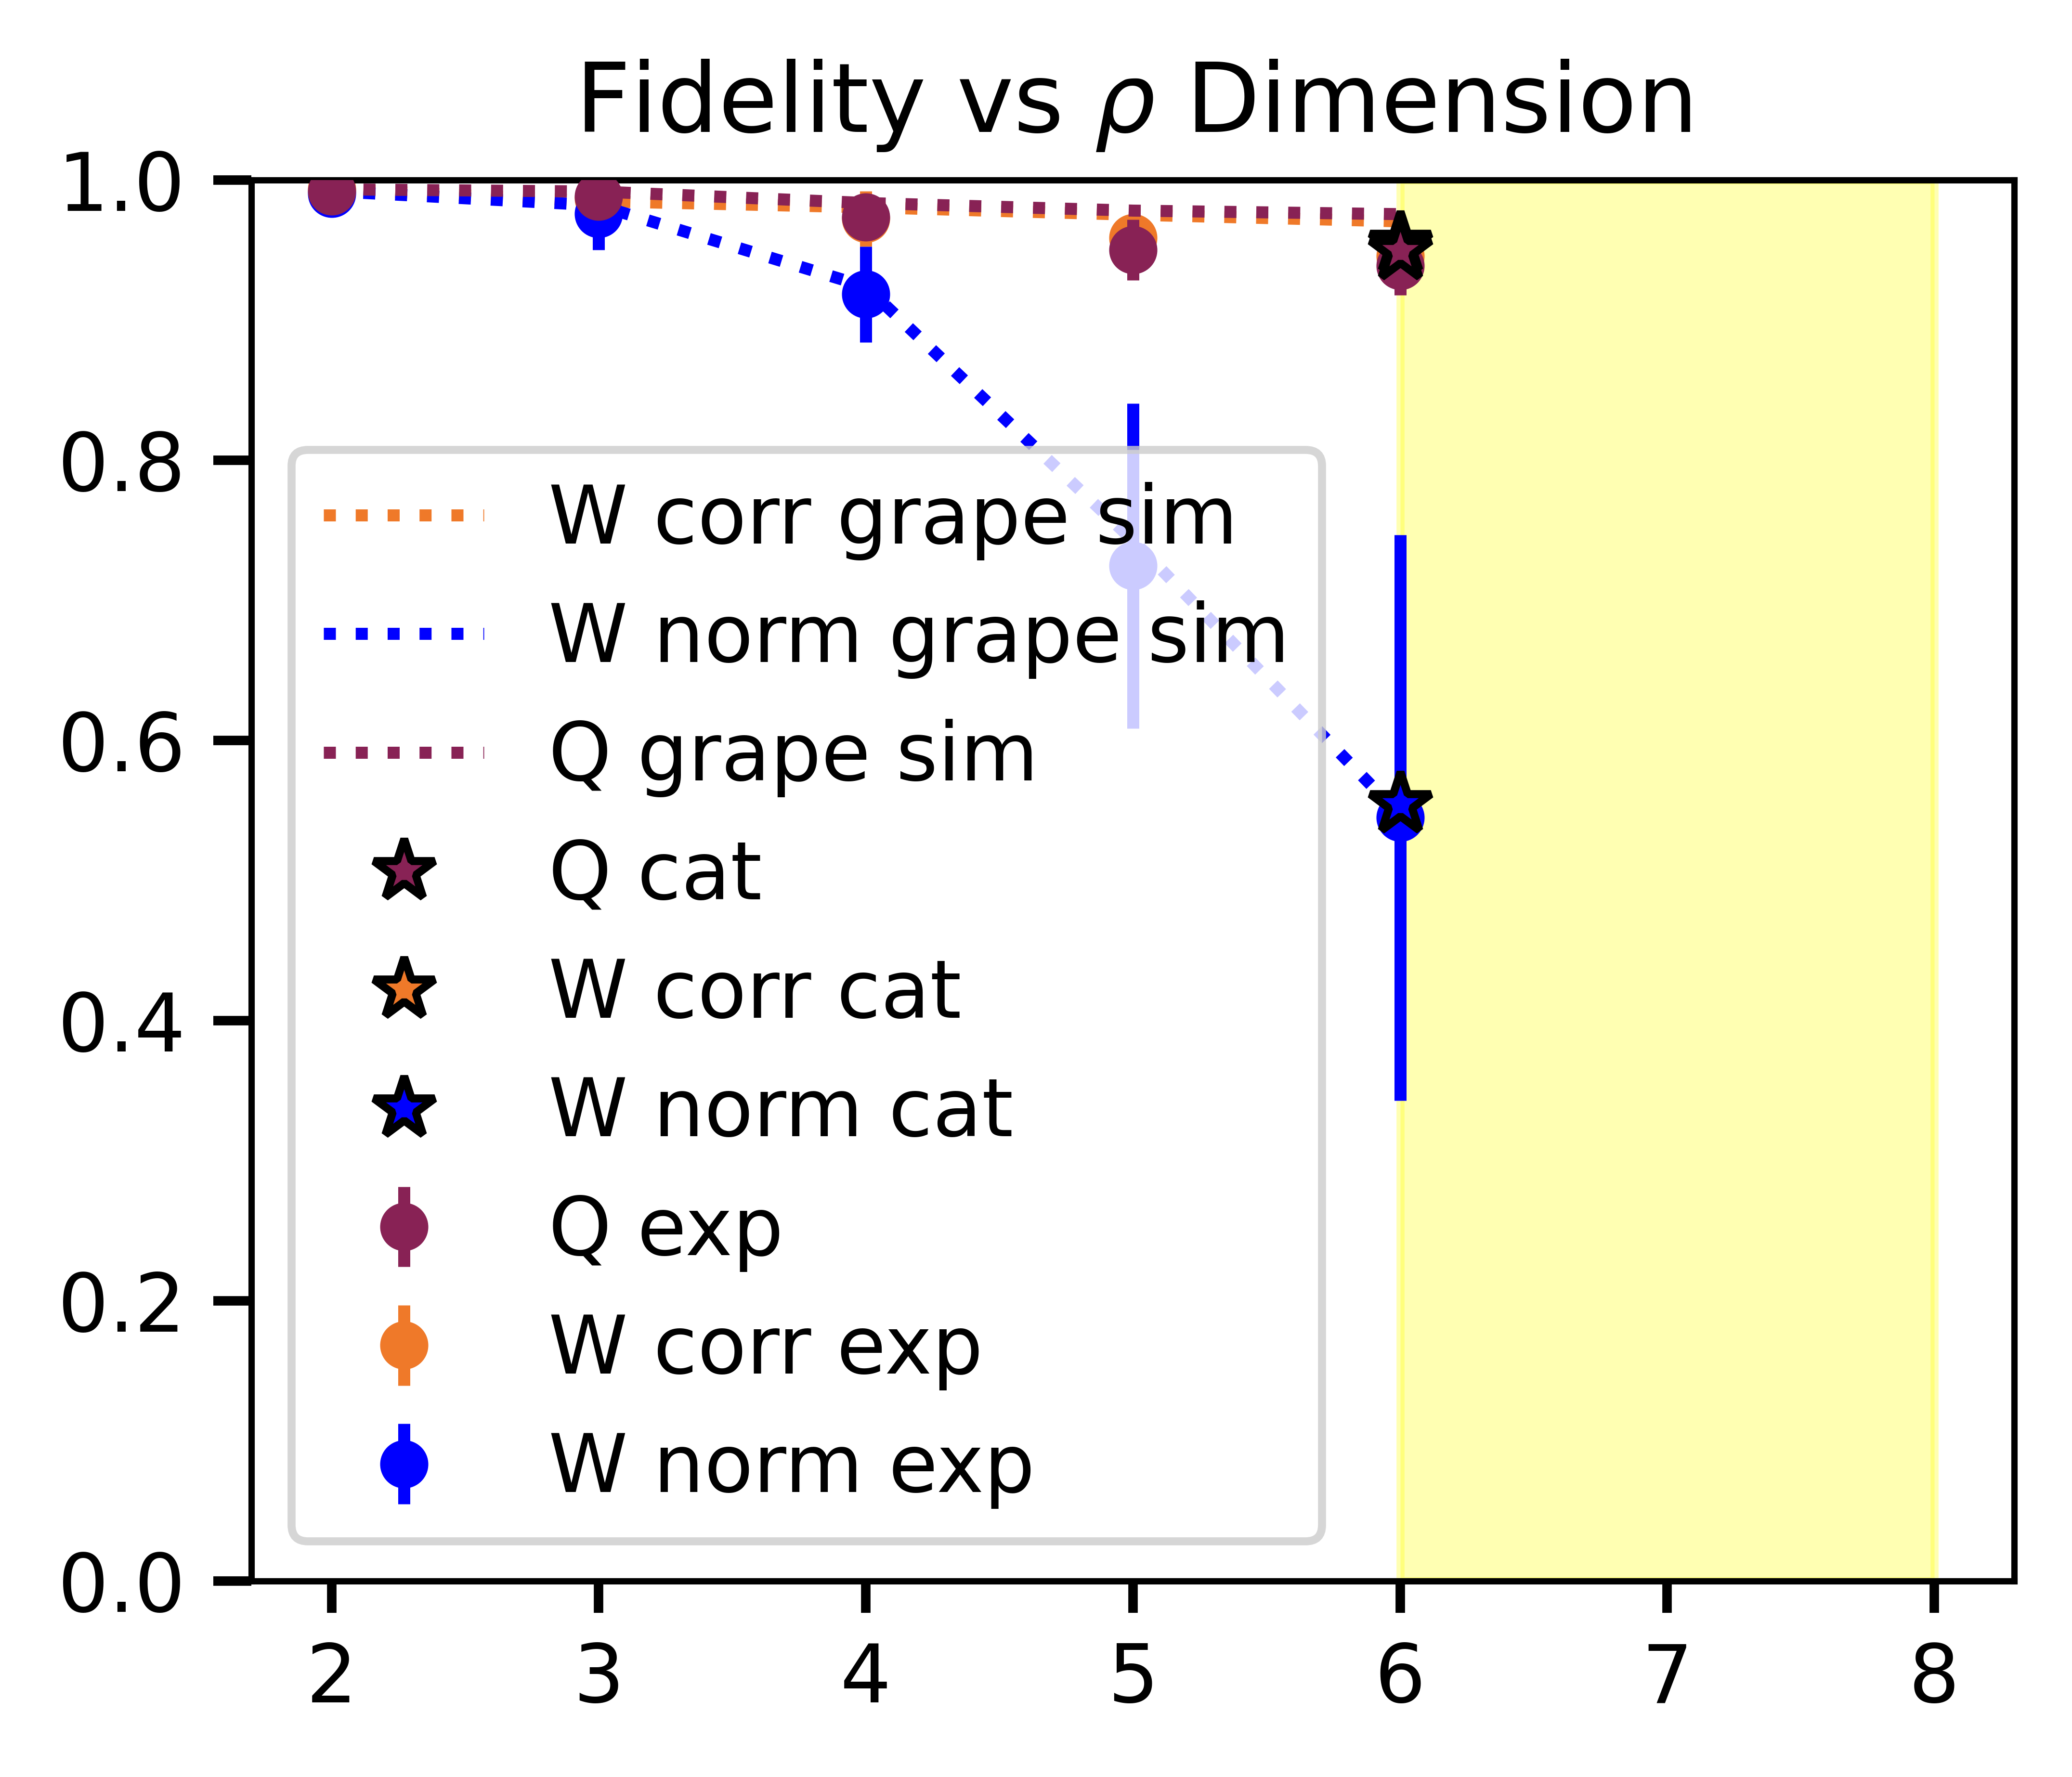

In [45]:
fig = plt.figure(figsize=(10 * cm, 8 * cm), dpi=1200)
ax = fig.add_subplot(111)
plt.setp(ax.spines.values(), linewidth=2 * cm)

hfont = {"fontname": "Corbel"}
ax.tick_params(axis="x", which="major", length=10 * cm, width=3 * cm)
ax.tick_params(axis="y", which="major", length=12 * cm, width=3 * cm)
ax.tick_params(axis="both", which="minor", length=6 * cm, width=2 * cm)

ax.set_ylim([0, 1])
sim_dimensions = [2, 3, 4, 5, 6, 7, 8]
exp_dimensions = [2, 3, 4, 5, 6]
s = [5, 5, 5, 5, 5, 0, 0]

my_labels = {"Q exp": "Q exp", "W corr exp": "W corr exp", "W norm exp": "W norm exp"}

for i in range(len(exp_dimensions)):
    ax.errorbar(
        x=i + 2,
        y=Q_exp_results[i, 0],
        yerr=Q_exp_results[i, 1],
        c=color_Q,
        fmt="o",
        label=my_labels["Q exp"],
        #     marker=marker_shape[i],
        markersize=s[i],
        #     edgecolor=edge_color[i],
        #     linewidth=lw,
        zorder=3,
    )
    my_labels["Q exp"] = "_nolegend_"
    ax.errorbar(
        x=i + 2,
        y=W_corr_exp_results[i, 0],
        yerr=W_corr_exp_results[i, 1],
        c=color_W_corr,
        fmt="o",
        label=my_labels["W corr exp"],
        #     marker=marker_shape[i],
        markersize=s[i],
        #     edgecolor=edge_color[i],
        #     linewidth=lw,
        zorder=1,
    )
    my_labels["W corr exp"] = "_nolegend_"
    ax.errorbar(
        x=i + 2,
        y=W_norm_exp_results[i, 0],
        yerr=W_norm_exp_results[i, 1],
        c=color_W_norm,
        fmt="o",
        label=my_labels["W norm exp"],
        #     marker=marker_shape[i],
        markersize=s[i],
        #     edgecolor=edge_color[i],
        #     linewidth=lw,
        zorder=2,
    )
    my_labels["W norm exp"] = "_nolegend_"


# plt.plot(dimensions, Q_sim_grape_results[:, 0], ":", color=color_Q, label="Q sim")

# plt.plot(
#     sim_dimensions,
#     W_corr_sim_ideal_results[:, 0],
#     ":",
#     color=color_W_corr,
#     label="W corr ideal sim",
# )

plt.plot(
    exp_dimensions,
    W_corr_sim_grape_results[:, 0],
    ":",
    color=color_W_corr,
    label="W corr grape sim",
)

# plt.plot(
#     sim_dimensions,
#     W_norm_sim_ideal_results[:, 0],
#     ":",
#     color=color_W_norm,
#     label="W norm ideal sim",
# )
plt.plot(
    exp_dimensions,
    W_norm_sim_grape_results[:, 0],
    ":",
    color=color_W_norm,
    label="W norm grape sim",
)

# plt.plot(
#     sim_dimensions,
#     Q_sim_ideal_results[:, 0],
#     ":",
#     color=color_Q,
#     label="Q ideal sim",
# )
plt.plot(
    exp_dimensions,
    Q_sim_grape_results[:, 0],
    ":",
    color=color_Q,
    label="Q grape sim",
)

plt.plot(
    6,
    Q_exp_T2_fidelities[0, 0],
    "*",
    color=color_Q,
    label="Q cat",
    mec="black",
    markersize=8,
    zorder=5,
)
plt.plot(
    6,
    W_corr_exp_T2_fidelities[0, 0],
    "*",
    color=color_W_corr,
    label="W corr cat",
    mec="black",
    markersize=8,
    zorder=4,
)
plt.plot(
    6,
    W_norm_exp_T2_fidelities[0, 0],
    "*",
    color=color_W_norm,
    mec="black",
    label="W norm cat",
    markersize=8,
    zorder=4,
)

ax.fill_between(range(6, 9), 0, 1, alpha=0.3, color="yellow")
ax.legend()
ax.set_title("Fidelity vs " + r"$\rho$" + " Dimension")
plt.show()